In [1]:
import pandas as pd
from pymongo import MongoClient
mongo_uri = "mongodb://localhost:27017"
connection = MongoClient(mongo_uri)

# CREATE DATABASE
database = connection['roundRobinParams']
# CREATE COLLECTION
collection = database['params']

In [2]:
data = pd.DataFrame(list(collection.find()))
data.head()

ServerSelectionTimeoutError: 10.20.0.250:27017: [Errno 111] Connection refused, Timeout: 30s, Topology Description: <TopologyDescription id: 622df73042d9673369c032ae, topology_type: Single, servers: [<ServerDescription ('10.20.0.250', 27017) server_type: Unknown, rtt: None, error=AutoReconnect('10.20.0.250:27017: [Errno 111] Connection refused',)>]>

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1160 entries, 0 to 1159
Data columns (total 9 columns):
_id                1160 non-null object
byteReceived       1160 non-null object
byteSent           1160 non-null object
delay              1160 non-null object
dst                1160 non-null object
linkUtilization    1160 non-null object
packetLoss         1160 non-null object
src                1160 non-null object
time               1160 non-null object
dtypes: object(9)
memory usage: 81.6+ KB


In [36]:
columns = ['byteSent', 'byteReceived', 'delay', 'packetLoss', 'linkUtilization']

In [37]:
for col in columns:
    data[col] = data[col].astype(float)

In [38]:
byte_sent = data.loc[data['byteSent'] > 10**6]
byte_sent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 646 entries, 1 to 743
Data columns (total 9 columns):
_id                646 non-null object
byteReceived       646 non-null float64
byteSent           646 non-null float64
delay              646 non-null float64
dst                646 non-null object
linkUtilization    646 non-null float64
packetLoss         646 non-null float64
src                646 non-null object
time               646 non-null object
dtypes: float64(5), object(4)
memory usage: 50.5+ KB


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
# the size of A4 paper
plt.figure(figsize=(15,8))
#sns.lineplot(data=data['delay'])

<Figure size 1080x576 with 0 Axes>

<Figure size 1080x576 with 0 Axes>

In [40]:
data['time'] = data['time'].astype(int)

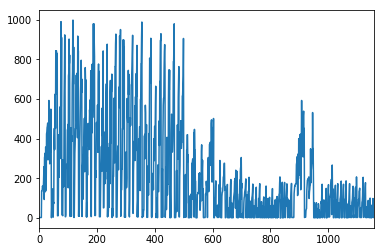

In [41]:
data['delay'].plot()

In [42]:
count_labels = 0
times = data['time'].values
first_time = times[0]
kq = []
for time in times:
    if first_time + 100000 > time:
        kq.append(count_labels)
    else:
        count_labels += 1
        first_time = time
        kq.append(count_labels)


In [43]:
data['label_time'] = kq

In [44]:
data

,_id,byteReceived,byteSent,delay,dst,linkUtilization,packetLoss,src,time,label_time
0,620a28a9847f402752df502e,3087276.0,794.0,2.0,of:0000000000000002,0.000159,0.0,of:0000000000000001,1644832937522,0
1,620a28a9847f402752df502f,2184.0,3087206.0,1.0,of:0000000000000006,0.308800,0.0,of:0000000000000001,1644832937522,0
2,620a28a9847f402752df5030,794.0,864.0,2.0,of:0000000000000004,0.000173,0.0,of:0000000000000001,1644832937522,0
3,620a28a9847f402752df5031,794.0,794.0,2.0,of:0000000000000003,0.000159,0.0,of:0000000000000004,1644832937523,0
4,620a28a9847f402752df5032,2884640.0,864.0,2.0,of:0000000000000007,0.000173,0.0,of:0000000000000003,1644832937522,0
5,620a28a9847f402752df5033,864.0,864.0,2.0,of:0000000000000005,0.000173,0.0,of:0000000000000004,1644832937524,0
6,620a28a9847f402752df5034,864.0,794.0,2.0,of:0000000000000001,0.000159,0.0,of:0000000000000004,1644832937522,0
7,620a28a9847f402752df5035,864.0,1338298.0,2.0,of:0000000000000008,0.133913,0.0,of:0000000000000005,1644832937524,0
8,620a28a9847f402752df5036,3087276.0,794.0,136.0,of:0000000000000002,0.000159,0.0,of:0000000000000001,1644832937656,0
9,620a28a9847f402752df5037,2884640.0,864.0,136.0,of:0000000000000007,0.000173,0.0,of:0000000000000003,1644832937657,0


In [45]:
import numpy as np

In [46]:
kq_tich = []
for i, cluster in data.groupby('label_time'):
    kq_tich.append(np.prod(cluster['delay'] + 0.001))
    

In [47]:
kq_tich

[inf,
 inf,
 9.015198226985166e+44,
 1.0407932877242819e+212,
 6.893202104431679e+63,
 1.5142331301404184e+74,
 1.9460507381539984e+80,
 109416731321.01256,
 1.0394795726881532e+16,
 25.026000999999997]

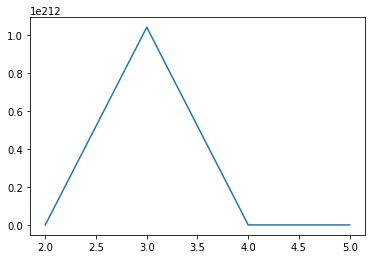

In [51]:
# RRBin 
plt.plot(kq_tich[0:-4])

In [52]:
df = pd.DataFrame(kq_tich)


df.to_csv("/home/onos/Downloads/A-Server-and-Route-selection-mechanism/flaskSDN/phanTichRR.csv", index = False, header=False)

In [60]:
rr = pd.read_csv("/home/onos/Downloads/A-Server-and-Route-selection-mechanism/flaskSDN/phanTichRR.csv", header=None)

In [61]:
dt = pd.read_csv("/home/onos/Downloads/A-Server-and-Route-selection-mechanism/flaskSDN/phanTichDT.csv", header=None)

In [71]:
di = dt.to_numpy()

In [73]:
round = rr.to_numpy()

In [89]:
def plot(dijkstra, roundRobin, title='So sanh delay giua thuat toan RoundRobin va Dijkstra', y_label='Delay', x_label='Time'):

    fig, ax = plt.subplots()
    # ax.plot(dijkstra,   '#325288')
    # ax.plot(roundRobin, '#24A13C')
    plt.plot(roundRobin, label='RoundRobin')
    plt.plot(dijkstra[4:], label='Dijkstra')
    
    #ax.format_ydata = price
    ax.set_title(title)
    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.legend()

    plt.show()